# 1ª Parte – Desenvolvimento Pipeline/Notebook

### Bibliotecas 

In [1]:
!pip install pyodbc
!pip install pyspark

import pandas as pd
import os
import datetime
import pyodbc
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Workflow de dados
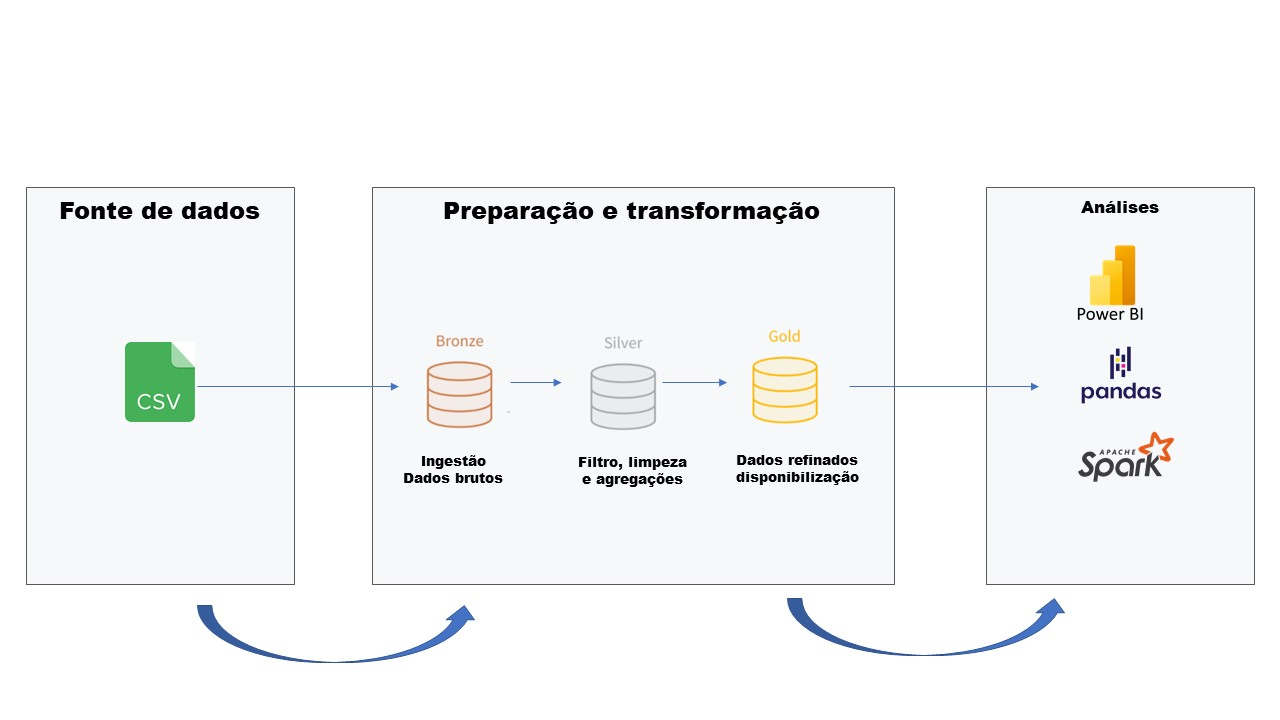

### Modelo Conceitual

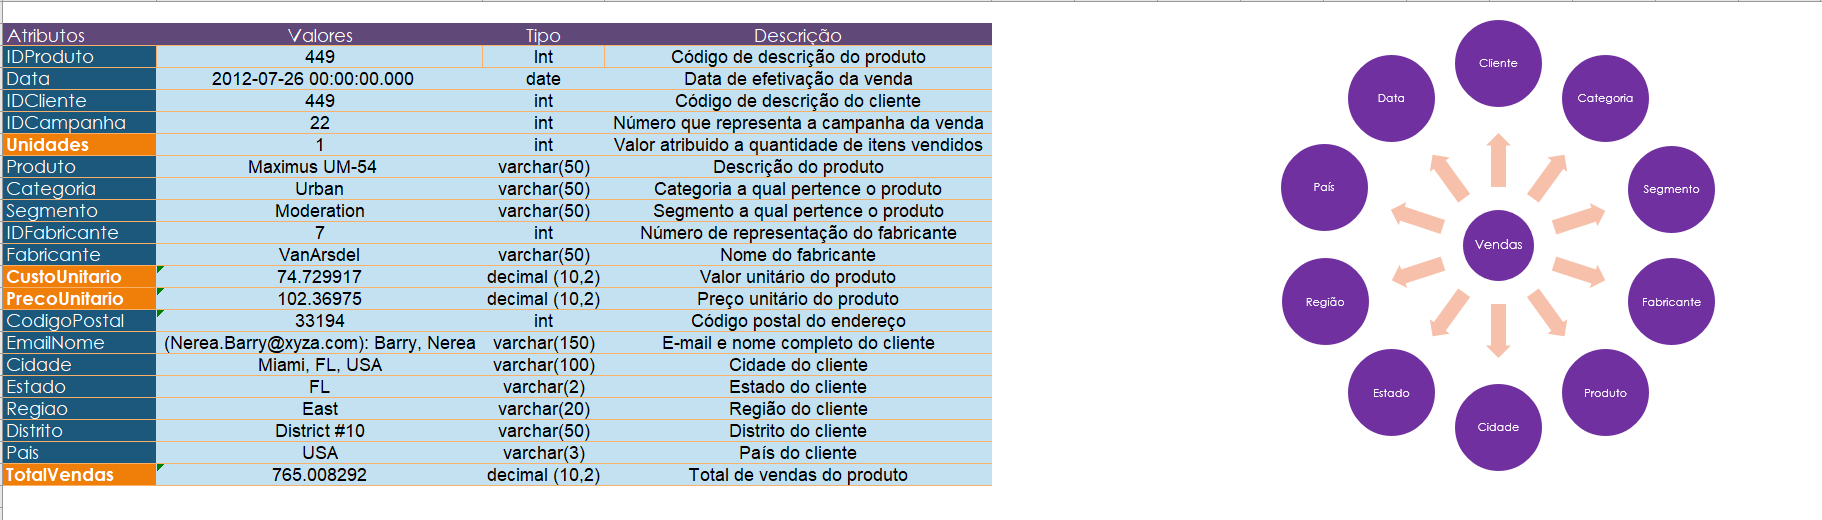

### Modelo lógico

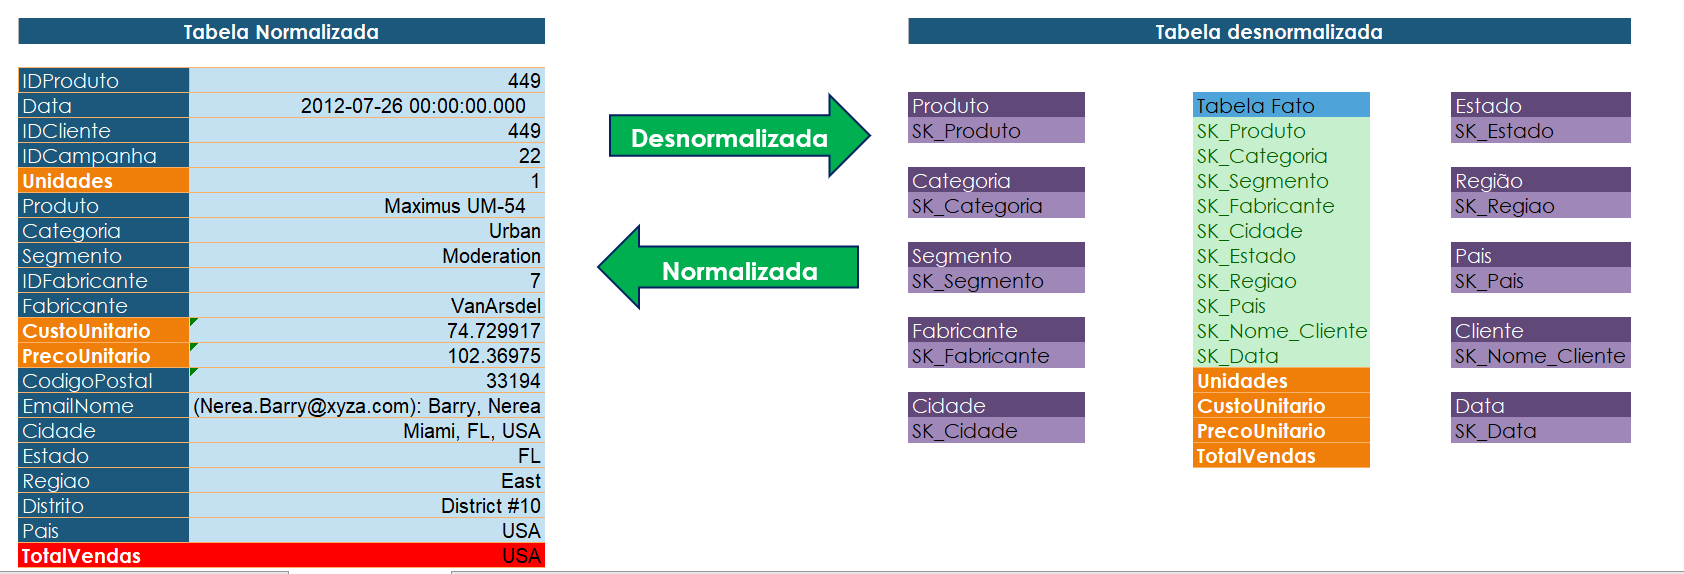

### Modelo Entidade Relacionamento - Modelo Star Schema 
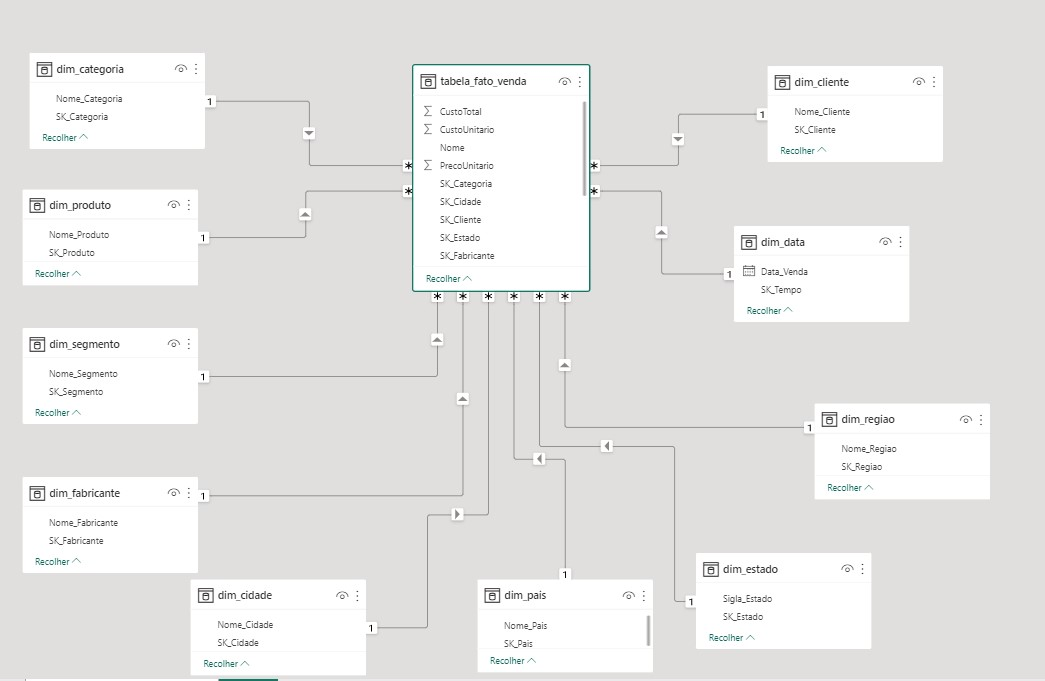

## Extração dos dados brutos

### Bronze

In [2]:
df = pd.read_csv('Vendas.csv')

In [3]:
#Analisando o dataset
df.head()

,IDProduto,Data,IDCliente,IDCampanha,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,CodigoPostal,EmailNome,Cidade,Estado,Regiao,Distrito,Pais
0,449,2012-07-26 00:00:00.000,247546,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33194,"(Nerea.Barry@xyza.com): Barry, Nerea","Miami, FL, USA",FL,East,District #10,USA
1,449,2013-10-31 00:00:00.000,124593,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33177,"(Elliott.Stuart@xyza.com): Stuart, Elliott","Miami, FL, USA",FL,East,District #10,USA
2,449,2013-11-14 00:00:00.000,163517,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33172,"(Holmes.Swanson@xyza.com): Swanson, Holmes","Miami, FL, USA",FL,East,District #10,USA
3,449,2013-01-17 00:00:00.000,8875,18,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33169,"(Nyssa.Solis@xyza.com): Solis, Nyssa","Miami, FL, USA",FL,East,District #10,USA
4,449,2014-09-13 00:00:00.000,8894,21,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33169,"(Ivana.Wall@xyza.com): Wall, Ivana","Miami, FL, USA",FL,East,District #10,USA


In [4]:
df.shape

(675368, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675368 entries, 0 to 675367
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   IDProduto      675368 non-null  int64  
 1   Data           675368 non-null  object 
 2   IDCliente      675368 non-null  int64  
 3   IDCampanha     675368 non-null  int64  
 4   Unidades       675368 non-null  int64  
 5   Produto        675368 non-null  object 
 6   Categoria      675368 non-null  object 
 7   Segmento       675368 non-null  object 
 8   IDFabricante   675368 non-null  int64  
 9   Fabricante     675368 non-null  object 
 10  CustoUnitario  675368 non-null  float64
 11  PrecoUnitario  675368 non-null  float64
 12  CodigoPostal   675368 non-null  int64  
 13  EmailNome      675368 non-null  object 
 14  Cidade         675368 non-null  object 
 15  Estado         675368 non-null  object 
 16  Regiao         675368 non-null  object 
 17  Distrito       675368 non-nul

## Transformação dos Dados

### Silver

In [6]:
#Verificando os tipos de dados
df.dtypes

IDProduto          int64
Data              object
IDCliente          int64
IDCampanha         int64
Unidades           int64
Produto           object
Categoria         object
Segmento          object
IDFabricante       int64
Fabricante        object
CustoUnitario    float64
PrecoUnitario    float64
CodigoPostal       int64
EmailNome         object
Cidade            object
Estado            object
Regiao            object
Distrito          object
Pais              object
dtype: object

In [7]:
#Transformando o tipo de dados
df['Data'] = pd.to_datetime(df['Data'])

In [8]:
#Verificando a quantidade de nulos
df.isnull().sum()

IDProduto        0
Data             0
IDCliente        0
IDCampanha       0
Unidades         0
Produto          0
Categoria        0
Segmento         0
IDFabricante     0
Fabricante       0
CustoUnitario    0
PrecoUnitario    0
CodigoPostal     0
EmailNome        0
Cidade           0
Estado           0
Regiao           0
Distrito         0
Pais             0
dtype: int64

In [9]:
df.head()

,IDProduto,Data,IDCliente,IDCampanha,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,CodigoPostal,EmailNome,Cidade,Estado,Regiao,Distrito,Pais
0,449,2012-07-26,247546,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33194,"(Nerea.Barry@xyza.com): Barry, Nerea","Miami, FL, USA",FL,East,District #10,USA
1,449,2013-10-31,124593,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33177,"(Elliott.Stuart@xyza.com): Stuart, Elliott","Miami, FL, USA",FL,East,District #10,USA
2,449,2013-11-14,163517,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33172,"(Holmes.Swanson@xyza.com): Swanson, Holmes","Miami, FL, USA",FL,East,District #10,USA
3,449,2013-01-17,8875,18,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33169,"(Nyssa.Solis@xyza.com): Solis, Nyssa","Miami, FL, USA",FL,East,District #10,USA
4,449,2014-09-13,8894,21,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33169,"(Ivana.Wall@xyza.com): Wall, Ivana","Miami, FL, USA",FL,East,District #10,USA


In [10]:
#Tratar a coluna nome, separando e-mail de nome
# Dividindo a coluna 'EmailNome' em duas colunas separadas
df[['Email', 'Nome']] = df['EmailNome'].str.split(':', 1, expand=True)

# Removendo os parênteses e espaços em branco extras
df['Email'] = df['Email'].str.strip('()').str.strip()
df['Nome'] = df['Nome'].str.strip()

# Exibindo o DataFrame resultante
print(df)


C:\Users\ngfiamoncini\AppData\Local\Temp\ipykernel_17260\1163253149.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Email', 'Nome']] = df['EmailNome'].str.split(':', 1, expand=True)


        IDProduto       Data  IDCliente  IDCampanha  Unidades        Produto  \
0             449 2012-07-26     247546          22         1  Maximus UM-54   
1             449 2013-10-31     124593          22         1  Maximus UM-54   
2             449 2013-11-14     163517          22         1  Maximus UM-54   
3             449 2013-01-17       8875          18         1  Maximus UM-54   
4             449 2014-09-13       8894          21         1  Maximus UM-54   
...           ...        ...        ...         ...       ...            ...   
675363        407 2012-05-20      32464           3         1  Maximus UM-12   
675364        407 2011-03-02      32441           5         1  Maximus UM-12   
675365        407 2012-06-02     101533           1         1  Maximus UM-12   
675366        407 2011-04-10     147192           4         1  Maximus UM-12   
675367        407 2012-03-01     237766           3         1  Maximus UM-12   

        Categoria    Segmento  IDFabric

In [11]:
#Descartando a coluna EmailNome
df.drop(columns= {'EmailNome'}, inplace=True)
df.head()

,IDProduto,Data,IDCliente,IDCampanha,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,CodigoPostal,Cidade,Estado,Regiao,Distrito,Pais,Email,Nome
0,449,2012-07-26,247546,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33194,"Miami, FL, USA",FL,East,District #10,USA,Nerea.Barry@xyza.com,"Barry, Nerea"
1,449,2013-10-31,124593,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33177,"Miami, FL, USA",FL,East,District #10,USA,Elliott.Stuart@xyza.com,"Stuart, Elliott"
2,449,2013-11-14,163517,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33172,"Miami, FL, USA",FL,East,District #10,USA,Holmes.Swanson@xyza.com,"Swanson, Holmes"
3,449,2013-01-17,8875,18,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33169,"Miami, FL, USA",FL,East,District #10,USA,Nyssa.Solis@xyza.com,"Solis, Nyssa"
4,449,2014-09-13,8894,21,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33169,"Miami, FL, USA",FL,East,District #10,USA,Ivana.Wall@xyza.com,"Wall, Ivana"


In [12]:
#Contagem dos dados
df.count()

IDProduto        675368
Data             675368
IDCliente        675368
IDCampanha       675368
Unidades         675368
Produto          675368
Categoria        675368
Segmento         675368
IDFabricante     675368
Fabricante       675368
CustoUnitario    675368
PrecoUnitario    675368
CodigoPostal     675368
Cidade           675368
Estado           675368
Regiao           675368
Distrito         675368
Pais             675368
Email            675368
Nome             675368
dtype: int64

In [13]:
#Tratamento da coluna Cidade, manter apenas o nome da cidade. 
df['Cidade'] = df['Cidade'].str.split(',').str[0]
df.head()

,IDProduto,Data,IDCliente,IDCampanha,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,CodigoPostal,Cidade,Estado,Regiao,Distrito,Pais,Email,Nome
0,449,2012-07-26,247546,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33194,Miami,FL,East,District #10,USA,Nerea.Barry@xyza.com,"Barry, Nerea"
1,449,2013-10-31,124593,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33177,Miami,FL,East,District #10,USA,Elliott.Stuart@xyza.com,"Stuart, Elliott"
2,449,2013-11-14,163517,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33172,Miami,FL,East,District #10,USA,Holmes.Swanson@xyza.com,"Swanson, Holmes"
3,449,2013-01-17,8875,18,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33169,Miami,FL,East,District #10,USA,Nyssa.Solis@xyza.com,"Solis, Nyssa"
4,449,2014-09-13,8894,21,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33169,Miami,FL,East,District #10,USA,Ivana.Wall@xyza.com,"Wall, Ivana"


In [14]:
#Eliminar as colunas IDCampanha, distrito e código postal
df.drop(columns= {'IDCampanha', 'Distrito', 'CodigoPostal'}, inplace=True)
df.head()

,IDProduto,Data,IDCliente,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,Cidade,Estado,Regiao,Pais,Email,Nome
0,449,2012-07-26,247546,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Nerea.Barry@xyza.com,"Barry, Nerea"
1,449,2013-10-31,124593,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Elliott.Stuart@xyza.com,"Stuart, Elliott"
2,449,2013-11-14,163517,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Holmes.Swanson@xyza.com,"Swanson, Holmes"
3,449,2013-01-17,8875,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Nyssa.Solis@xyza.com,"Solis, Nyssa"
4,449,2014-09-13,8894,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Ivana.Wall@xyza.com,"Wall, Ivana"


In [15]:
#Verificando a quantidade de dados duplicados
df.duplicated().sum()

133

In [16]:
#Removendo os valores duplicados
df = df.drop_duplicates()
df.duplicated().sum()

0

In [17]:
#Analisando os dados duplicados
duplicados = df[df.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [IDProduto, Data, IDCliente, Unidades, Produto, Categoria, Segmento, IDFabricante, Fabricante, CustoUnitario, PrecoUnitario, Cidade, Estado, Regiao, Pais, Email, Nome]
Index: []


In [18]:
#Transformando a coluna CustoUnitario e PrecUnitário, aplicando arredondamento para duas casas decimais

df['CustoUnitario'] = df['CustoUnitario'].apply(lambda x: '{:.2f}'.format(x))
df['PrecoUnitario'] = df['PrecoUnitario'].apply(lambda x: '{:.2f}'.format(x))

df.head()

,IDProduto,Data,IDCliente,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,Cidade,Estado,Regiao,Pais,Email,Nome
0,449,2012-07-26,247546,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Nerea.Barry@xyza.com,"Barry, Nerea"
1,449,2013-10-31,124593,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Elliott.Stuart@xyza.com,"Stuart, Elliott"
2,449,2013-11-14,163517,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Holmes.Swanson@xyza.com,"Swanson, Holmes"
3,449,2013-01-17,8875,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Nyssa.Solis@xyza.com,"Solis, Nyssa"
4,449,2014-09-13,8894,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Ivana.Wall@xyza.com,"Wall, Ivana"


In [19]:
# Removendo a vírgula na coluna Nome e invertendo o nome
df['Nome'] = df['Nome'].apply(lambda x: ' '.join(reversed(x.split(', '))))

df.head()

,IDProduto,Data,IDCliente,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,Cidade,Estado,Regiao,Pais,Email,Nome
0,449,2012-07-26,247546,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Nerea.Barry@xyza.com,Nerea Barry
1,449,2013-10-31,124593,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Elliott.Stuart@xyza.com,Elliott Stuart
2,449,2013-11-14,163517,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Holmes.Swanson@xyza.com,Holmes Swanson
3,449,2013-01-17,8875,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Nyssa.Solis@xyza.com,Nyssa Solis
4,449,2014-09-13,8894,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Ivana.Wall@xyza.com,Ivana Wall


In [20]:
#Adicionando uma coluna agregada com total de vendas e custo total

df['TotalVendas'] = df['PrecoUnitario'] * df['Unidades']
df['CustoTotal'] = df['CustoUnitario'] * df['Unidades']

df.head()

,IDProduto,Data,IDCliente,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,Cidade,Estado,Regiao,Pais,Email,Nome,TotalVendas,CustoTotal
0,449,2012-07-26,247546,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Nerea.Barry@xyza.com,Nerea Barry,102.37,74.73
1,449,2013-10-31,124593,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Elliott.Stuart@xyza.com,Elliott Stuart,102.37,74.73
2,449,2013-11-14,163517,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Holmes.Swanson@xyza.com,Holmes Swanson,102.37,74.73
3,449,2013-01-17,8875,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Nyssa.Solis@xyza.com,Nyssa Solis,102.37,74.73
4,449,2014-09-13,8894,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,102.37,Miami,FL,East,USA,Ivana.Wall@xyza.com,Ivana Wall,102.37,74.73


### Gold

In [21]:
# Remover duplicatas e redefinir o atributo Produto
df_produto = df.drop_duplicates(subset="Produto").reset_index(drop=True)

# Criar lista de dicionários para o novo DataFrame
data = [{"SK_Produto": index + 1, "Nome_Produto": row["Produto"]} for index, row in df_produto.iterrows()]

# Criar o novo DataFrame
df_tratado_produto = pd.DataFrame(data)

# Exibir o novo DataFrame
print(df_tratado_produto)

     SK_Produto   Nome_Produto
0             1  Maximus UM-54
1             2  Maximus UM-75
2             3  Maximus UM-01
3             4  Maximus UM-62
4             5  Maximus UM-38
..          ...            ...
168         169  Maximus RS-01
169         170  Maximus RP-01
170         171  Maximus RP-02
171         172  Maximus UM-05
172         173  Maximus UM-07

[173 rows x 2 columns]


In [22]:
# Remover duplicatas do atributo Categoria
df_categoria = df.drop_duplicates(subset="Categoria").reset_index(drop=True)

# Criar lista de dicionários para o novo DataFrame com chave iniciando no número 1
data = [{"SK_Categoria": index + 1, "Nome_Categoria": row["Categoria"]} for index, row in df_categoria.iterrows()]

# Criar o novo DataFrame
df_tratado_categoria = pd.DataFrame(data)

# Exibir o novo DataFrame
print(df_tratado_categoria)


   SK_Categoria Nome_Categoria
0             1          Urban
1             2            Mix
2             3          Youth
3             4          Rural
4             5      Accessory


In [23]:
#Certificando remoção de duplicados e valores únicos
valores_unicos = df_tratado_categoria['Nome_Categoria'].unique()
print(valores_unicos)


['Urban' 'Mix' 'Youth' 'Rural' 'Accessory']


In [24]:
# Remover duplicatas e redefinir o índice do atributo Segmento
df_segmento = df.drop_duplicates(subset="Segmento").reset_index(drop=True)

# Criar lista de dicionários para o novo DataFrame
data = [{"SK_Segmento": index + 1, "Nome_Segmento": row["Segmento"]} for index, row in df_segmento.iterrows()]

# Criar o novo DataFrame
df_tratado_segmento = pd.DataFrame(data)

# Exibir o novo DataFrame
print(df_tratado_segmento)

   SK_Segmento Nome_Segmento
0            1    Moderation
1            2   Convenience
2            3       Extreme
3            4       Regular
4            5    All Season
5            6  Productivity
6            7         Youth
7            8        Select
8            9     Accessory


In [25]:
# Remover duplicatas e redefinir o índice do atributo Fabricante
df_fabricante = df.drop_duplicates(subset="Fabricante").reset_index(drop=True)

# Criar lista de dicionários para o novo DataFrame
data = [{"SK_Fabricante": index + 1, "Nome_Fabricante": row["Fabricante"]} for index, row in df_fabricante.iterrows()]

# Criar o novo DataFrame
df_tratado_fabricante = pd.DataFrame(data)

# Exibir o novo DataFrame
print(df_tratado_fabricante)

   SK_Fabricante Nome_Fabricante
0              1       VanArsdel


In [26]:
df.Fabricante.value_counts()

VanArsdel    675235
Name: Fabricante, dtype: int64

In [27]:
# Remover duplicatas e redefinir o índice do atributo Fabricante
df_nome = df.drop_duplicates(subset="Nome").reset_index(drop=True)

# Criar lista de dicionários para o novo DataFrame
data = [{"SK_Cliente": index + 1, "Nome_Cliente": row["Nome"]} for index, row in df_nome.iterrows()]

# Criar o novo DataFrame
df_tratado_nome_cliente = pd.DataFrame(data)

# Exibir o novo DataFrame
print(df_tratado_nome_cliente)

        SK_Cliente       Nome_Cliente
0                1        Nerea Barry
1                2     Elliott Stuart
2                3     Holmes Swanson
3                4        Nyssa Solis
4                5         Ivana Wall
...            ...                ...
250816      250817    Nichole Guthrie
250817      250818     Kirestin Sloan
250818      250819        Venus Floyd
250819      250820  Patience Williams
250820      250821  Aladdin Velazquez

[250821 rows x 2 columns]


In [28]:
df_original_temp = df[["Cidade"]].drop_duplicates(subset="Cidade")

# criar o novo dataframe com ID auto-incrementável
df_tratado_cidade = pd.DataFrame(columns=["SK_Cidade", "Nome_Cidade"])
current_id = 1
for index, row in df_original_temp.iterrows():
    temp_df = pd.DataFrame({
        "SK_Cidade": [current_id],
        "Nome_Cidade": [row["Cidade"]]
    })
    df_tratado_cidade = pd.concat([df_tratado_cidade, temp_df])
    current_id += 1


# exibir o novo dataframe
print(df_tratado_cidade)

   SK_Cidade       Nome_Cidade
0          1             Miami
0          2   Fort Lauderdale
0          3  Port Saint Lucie
0          4        Fort Myers
0          5             Tampa
..       ...               ...
0      14513         Sassafras
0      14514           Mayking
0      14515           Gunlock
0      14516        Clairfield
0      14517      Apalachicola

[14517 rows x 2 columns]


In [29]:
df_original_temp = df[["Estado"]].drop_duplicates(subset="Estado")

# criar o novo dataframe com ID auto-incrementável
df_tratado_estado = pd.DataFrame(columns=["SK_Estado", "Sigla_Estado"])
current_id = 1
for index, row in df_original_temp.iterrows():
    temp_df = pd.DataFrame({
        "SK_Estado": [current_id],
        "Sigla_Estado": [row["Estado"]]
    })
    df_tratado_estado = pd.concat([df_tratado_estado, temp_df])
    current_id += 1

# exibir o novo dataframe
print(df_tratado_estado)

  SK_Estado Sigla_Estado
0         1           FL
0         2           OH
0         3           PA
0         4           NY
0         5           MI
0         6           NC
0         7           IN
0         8           GA
0         9           NJ
0        10           SC
0        11           KY
0        12           WV
0        13           AL
0        14           IL
0        15           VA
0        16           CT
0        17           MD
0        18           MA
0        19           VT
0        20           DE
0        21           DC
0        22           RI
0        23           NH
0        24           MS
0        25           TN
0        26           LA
0        27           AR
0        28           NM
0        29           MO
0        30           KS
0        31           OK
0        32           CO
0        33           WY
0        34           NE
0        35           UT
0        36           MT
0        37           IA
0        38           SD
0        39           ND


In [30]:
df_original_temp = df[["Regiao"]].drop_duplicates(subset="Regiao")

# criar o novo dataframe com ID auto-incrementável
df_tratado_regiao = pd.DataFrame(columns=["SK_Regiao", "Nome_Regiao"])
current_id = 1
for index, row in df_original_temp.iterrows():
    temp_df = pd.DataFrame({
        "SK_Regiao": [current_id],
        "Nome_Regiao": [row["Regiao"]]
    })
    df_tratado_regiao = pd.concat([df_tratado_regiao, temp_df])
    current_id += 1

# exibir o novo dataframe
print(df_tratado_regiao)

  SK_Regiao Nome_Regiao
0         1        East
0         2     Central
0         3        West


In [31]:
df_original_temp = df[["Pais"]].drop_duplicates(subset="Pais")

# criar o novo dataframe com ID auto-incrementável
df_tratado_pais = pd.DataFrame(columns=["SK_Pais", "Nome_Pais"])
current_id = 1
for index, row in df_original_temp.iterrows():
    temp_df = pd.DataFrame({
        "SK_Pais": [current_id],
        "Nome_Pais": [row["Pais"]]
    })
    df_tratado_pais = pd.concat([df_tratado_pais, temp_df])
    current_id += 1

# exibir o novo dataframe
print(df_tratado_pais)

  SK_Pais Nome_Pais
0       1       USA


In [32]:
df_original_temp = df[["Data"]].drop_duplicates(subset="Data")

# criar o novo dataframe com ID auto-incrementável
df_tratado_data = pd.DataFrame(columns=["SK_Tempo", "Data_Venda"])
current_id = 1
for index, row in df_original_temp.iterrows():
    temp_df = pd.DataFrame({
        "SK_Tempo": [current_id],
        "Data_Venda": [row["Data"]]
    })
    df_tratado_data = pd.concat([df_tratado_data, temp_df])
    current_id += 1

# exibir o novo dataframe
print(df_tratado_data)

   SK_Tempo Data_Venda
0         1 2012-07-26
0         2 2013-10-31
0         3 2013-11-14
0         4 2013-01-17
0         5 2014-09-13
..      ...        ...
0      1998 2011-01-03
0      1999 2014-11-28
0      2000 2015-11-26
0      2001 2013-11-22
0      2002 2012-01-01

[2002 rows x 2 columns]


In [33]:
# Junção dos data frames
df_final = df.merge(df_tratado_produto, left_on='Produto', right_on='Nome_Produto', how='left')
df_final = df_final.merge(df_tratado_categoria, left_on='Categoria', right_on='Nome_Categoria', how='left')
df_final = df_final.merge(df_tratado_segmento, left_on='Segmento', right_on='Nome_Segmento', how='left')
df_final = df_final.merge(df_tratado_fabricante, left_on='Fabricante', right_on='Nome_Fabricante', how='left')
df_final = df_final.merge(df_tratado_nome_cliente, left_on='Nome', right_on='Nome_Cliente', how='left')
df_final = df_final.merge(df_tratado_cidade, left_on='Cidade', right_on='Nome_Cidade', how='left')
df_final = df_final.merge(df_tratado_estado, left_on='Estado', right_on='Sigla_Estado', how='left')
df_final = df_final.merge(df_tratado_regiao, left_on='Regiao', right_on='Nome_Regiao', how='left')
df_final = df_final.merge(df_tratado_pais, left_on='Pais', right_on='Nome_Pais', how='left')
df_final = df_final.merge(df_tratado_data, left_on='Data', right_on='Data_Venda', how='left')

#Dataframe resultante
df_final.head()


,IDProduto,Data,IDCliente,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,...,SK_Cidade,Nome_Cidade,SK_Estado,Sigla_Estado,SK_Regiao,Nome_Regiao,SK_Pais,Nome_Pais,SK_Tempo,Data_Venda
0,449,2012-07-26,247546,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,...,1,Miami,1,FL,1,East,1,USA,1,2012-07-26
1,449,2013-10-31,124593,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,...,1,Miami,1,FL,1,East,1,USA,2,2013-10-31
2,449,2013-11-14,163517,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,...,1,Miami,1,FL,1,East,1,USA,3,2013-11-14
3,449,2013-01-17,8875,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,...,1,Miami,1,FL,1,East,1,USA,4,2013-01-17
4,449,2014-09-13,8894,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.73,...,1,Miami,1,FL,1,East,1,USA,5,2014-09-13


In [34]:
#verificando as colunas
df_final.columns

Index(['IDProduto', 'Data', 'IDCliente', 'Unidades', 'Produto', 'Categoria',
       'Segmento', 'IDFabricante', 'Fabricante', 'CustoUnitario',
       'PrecoUnitario', 'Cidade', 'Estado', 'Regiao', 'Pais', 'Email', 'Nome',
       'TotalVendas', 'CustoTotal', 'SK_Produto', 'Nome_Produto',
       'SK_Categoria', 'Nome_Categoria', 'SK_Segmento', 'Nome_Segmento',
       'SK_Fabricante', 'Nome_Fabricante', 'SK_Cliente', 'Nome_Cliente',
       'SK_Cidade', 'Nome_Cidade', 'SK_Estado', 'Sigla_Estado', 'SK_Regiao',
       'Nome_Regiao', 'SK_Pais', 'Nome_Pais', 'SK_Tempo', 'Data_Venda'],
      dtype='object')

In [35]:
#Criando o dataframe Fato de Vendas
df_fato_venda = df_final[["SK_Produto","SK_Categoria" , "SK_Segmento" ,"SK_Fabricante" ,"SK_Cidade", "SK_Estado" , "SK_Regiao" ,"SK_Pais", "SK_Cliente", "SK_Tempo", "Data", "Unidades" , "CustoUnitario" , "PrecoUnitario" , "Nome", "TotalVendas", "CustoTotal"]]

df_fato_venda.head()

,SK_Produto,SK_Categoria,SK_Segmento,SK_Fabricante,SK_Cidade,SK_Estado,SK_Regiao,SK_Pais,SK_Cliente,SK_Tempo,Data,Unidades,CustoUnitario,PrecoUnitario,Nome,TotalVendas,CustoTotal
0,1,1,1,1,1,1,1,1,1,1,2012-07-26,1,74.73,102.37,Nerea Barry,102.37,74.73
1,1,1,1,1,1,1,1,1,2,2,2013-10-31,1,74.73,102.37,Elliott Stuart,102.37,74.73
2,1,1,1,1,1,1,1,1,3,3,2013-11-14,1,74.73,102.37,Holmes Swanson,102.37,74.73
3,1,1,1,1,1,1,1,1,4,4,2013-01-17,1,74.73,102.37,Nyssa Solis,102.37,74.73
4,1,1,1,1,1,1,1,1,5,5,2014-09-13,1,74.73,102.37,Ivana Wall,102.37,74.73


### Carregamento dos dados

In [36]:
# Exportando o DataFrame da tabela fato e dimensões para arquivos CSV
df_fato_venda.to_csv('tabela_fato_venda.csv', index=False)
df_tratado_produto.to_csv('dim_produto.csv', index=False)
df_tratado_categoria.to_csv('dim_categoria.csv', index=False)
df_tratado_segmento.to_csv('dim_segmento.csv', index=False)
df_tratado_fabricante.to_csv('dim_fabricante.csv', index=False)
df_tratado_cidade.to_csv('dim_cidade.csv', index=False)
df_tratado_estado.to_csv('dim_estado.csv', index=False)
df_tratado_regiao.to_csv('dim_regiao.csv', index=False)
df_tratado_pais.to_csv('dim_pais.csv', index=False)
df_tratado_data.to_csv('dim_data.csv', index=False)
df_tratado_nome_cliente.to_csv('dim_cliente.csv', index=False)

In [37]:
# Carregando os dados da tabela fato
df_fato_venda = pd.read_csv("tabela_fato_venda.csv")

# Convertendo a coluna 'Data' para o tipo datetime
df_fato_venda['Data'] = pd.to_datetime(df_fato_venda['Data'])

# Criando colunas para ano e mês
df_fato_venda['ano'] = df_fato_venda['Data'].dt.year
df_fato_venda['mes'] = df_fato_venda['Data'].dt.month

# Percorrendo as partições únicas de ano e mês
for (ano, mes), partition_data in df_fato_venda.groupby(['ano', 'mes']):
    # Criar o diretório de destino se não existir
    diretorio_destino = f"tabela_fato_particionada/{ano}/mes_{mes}"
    os.makedirs(diretorio_destino, exist_ok=True)
    
    #Salvando a partição em um arquivo Parquet
    partition_data.to_parquet(f"{diretorio_destino}/dados.parquet", index=False)


# 2ª Parte – Conhecimentos PYTHON PANDAS

#### Extração dos dados brutos

In [38]:
#Extraindo os dados do csv
df2 = pd.read_csv('vendas.csv')
df2.head()

,IDProduto,Data,IDCliente,IDCampanha,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,CodigoPostal,EmailNome,Cidade,Estado,Regiao,Distrito,Pais
0,449,2012-07-26 00:00:00.000,247546,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33194,"(Nerea.Barry@xyza.com): Barry, Nerea","Miami, FL, USA",FL,East,District #10,USA
1,449,2013-10-31 00:00:00.000,124593,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33177,"(Elliott.Stuart@xyza.com): Stuart, Elliott","Miami, FL, USA",FL,East,District #10,USA
2,449,2013-11-14 00:00:00.000,163517,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33172,"(Holmes.Swanson@xyza.com): Swanson, Holmes","Miami, FL, USA",FL,East,District #10,USA
3,449,2013-01-17 00:00:00.000,8875,18,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33169,"(Nyssa.Solis@xyza.com): Solis, Nyssa","Miami, FL, USA",FL,East,District #10,USA
4,449,2014-09-13 00:00:00.000,8894,21,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33169,"(Ivana.Wall@xyza.com): Wall, Ivana","Miami, FL, USA",FL,East,District #10,USA


#### Limpeza e transformação dos dados

In [39]:
#Excluindo as colunas que não serão utilizadas na ánalise

df2.drop(columns= ['IDProduto', 'IDCliente', 'IDCampanha', 'IDFabricante', 'CodigoPostal', 'Distrito'], inplace=True)
df2.head()

,Data,Unidades,Produto,Categoria,Segmento,Fabricante,CustoUnitario,PrecoUnitario,EmailNome,Cidade,Estado,Regiao,Pais
0,2012-07-26 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"(Nerea.Barry@xyza.com): Barry, Nerea","Miami, FL, USA",FL,East,USA
1,2013-10-31 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"(Elliott.Stuart@xyza.com): Stuart, Elliott","Miami, FL, USA",FL,East,USA
2,2013-11-14 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"(Holmes.Swanson@xyza.com): Swanson, Holmes","Miami, FL, USA",FL,East,USA
3,2013-01-17 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"(Nyssa.Solis@xyza.com): Solis, Nyssa","Miami, FL, USA",FL,East,USA
4,2014-09-13 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"(Ivana.Wall@xyza.com): Wall, Ivana","Miami, FL, USA",FL,East,USA


In [40]:
df2[['Email', 'Nome']] = df2['EmailNome'].str.split(':', 1, expand=True)

# Removendo os parênteses e espaços em branco extras
df2['Email'] = df2['Email'].str.strip('()').str.strip()
df2['Nome'] = df2['Nome'].str.strip()

# Exibindo o DataFrame resultante
df2.head()

C:\Users\ngfiamoncini\AppData\Local\Temp\ipykernel_17260\120211773.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df2[['Email', 'Nome']] = df2['EmailNome'].str.split(':', 1, expand=True)


,Data,Unidades,Produto,Categoria,Segmento,Fabricante,CustoUnitario,PrecoUnitario,EmailNome,Cidade,Estado,Regiao,Pais,Email,Nome
0,2012-07-26 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"(Nerea.Barry@xyza.com): Barry, Nerea","Miami, FL, USA",FL,East,USA,Nerea.Barry@xyza.com,"Barry, Nerea"
1,2013-10-31 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"(Elliott.Stuart@xyza.com): Stuart, Elliott","Miami, FL, USA",FL,East,USA,Elliott.Stuart@xyza.com,"Stuart, Elliott"
2,2013-11-14 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"(Holmes.Swanson@xyza.com): Swanson, Holmes","Miami, FL, USA",FL,East,USA,Holmes.Swanson@xyza.com,"Swanson, Holmes"
3,2013-01-17 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"(Nyssa.Solis@xyza.com): Solis, Nyssa","Miami, FL, USA",FL,East,USA,Nyssa.Solis@xyza.com,"Solis, Nyssa"
4,2014-09-13 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"(Ivana.Wall@xyza.com): Wall, Ivana","Miami, FL, USA",FL,East,USA,Ivana.Wall@xyza.com,"Wall, Ivana"


In [41]:
#Descartando a coluna EmailNome
df2.drop(columns= {'EmailNome'}, inplace=True)
df2.head()

,Data,Unidades,Produto,Categoria,Segmento,Fabricante,CustoUnitario,PrecoUnitario,Cidade,Estado,Regiao,Pais,Email,Nome
0,2012-07-26 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"Miami, FL, USA",FL,East,USA,Nerea.Barry@xyza.com,"Barry, Nerea"
1,2013-10-31 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"Miami, FL, USA",FL,East,USA,Elliott.Stuart@xyza.com,"Stuart, Elliott"
2,2013-11-14 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"Miami, FL, USA",FL,East,USA,Holmes.Swanson@xyza.com,"Swanson, Holmes"
3,2013-01-17 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"Miami, FL, USA",FL,East,USA,Nyssa.Solis@xyza.com,"Solis, Nyssa"
4,2014-09-13 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,"Miami, FL, USA",FL,East,USA,Ivana.Wall@xyza.com,"Wall, Ivana"


In [42]:
#Tratamento da coluna Cidade, manter apenas o nome da cidade. 
df2['Cidade'] = df2['Cidade'].str.split(',').str[0]
df2.head()

,Data,Unidades,Produto,Categoria,Segmento,Fabricante,CustoUnitario,PrecoUnitario,Cidade,Estado,Regiao,Pais,Email,Nome
0,2012-07-26 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Nerea.Barry@xyza.com,"Barry, Nerea"
1,2013-10-31 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Elliott.Stuart@xyza.com,"Stuart, Elliott"
2,2013-11-14 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Holmes.Swanson@xyza.com,"Swanson, Holmes"
3,2013-01-17 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Nyssa.Solis@xyza.com,"Solis, Nyssa"
4,2014-09-13 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Ivana.Wall@xyza.com,"Wall, Ivana"


In [43]:
#Adicionando uma coluna agregada com total de vendas e custo total

df2['TotalVendas'] = df2['PrecoUnitario'] * df2['Unidades']
df2['CustoTotal'] = df2['CustoUnitario'] * df2['Unidades']

df2.head()

,Data,Unidades,Produto,Categoria,Segmento,Fabricante,CustoUnitario,PrecoUnitario,Cidade,Estado,Regiao,Pais,Email,Nome,TotalVendas,CustoTotal
0,2012-07-26 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Nerea.Barry@xyza.com,"Barry, Nerea",102.36975,74.729917
1,2013-10-31 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Elliott.Stuart@xyza.com,"Stuart, Elliott",102.36975,74.729917
2,2013-11-14 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Holmes.Swanson@xyza.com,"Swanson, Holmes",102.36975,74.729917
3,2013-01-17 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Nyssa.Solis@xyza.com,"Solis, Nyssa",102.36975,74.729917
4,2014-09-13 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Ivana.Wall@xyza.com,"Wall, Ivana",102.36975,74.729917


In [44]:
#Transformando a coluna CustoUnitario e PrecUnitário, aplicando arredondamento para duas casas decimais

# Convertendo valores de string para float
df2['CustoUnitario'] = df2['CustoUnitario'].apply(lambda x: float(x))
df2['PrecoUnitario'] = df2['PrecoUnitario'].apply(lambda x: float(x))

# Exibindo as primeiras linhas do DataFrame
print(df2.head())


                      Data  Unidades        Produto Categoria    Segmento  \
0  2012-07-26 00:00:00.000         1  Maximus UM-54     Urban  Moderation   
1  2013-10-31 00:00:00.000         1  Maximus UM-54     Urban  Moderation   
2  2013-11-14 00:00:00.000         1  Maximus UM-54     Urban  Moderation   
3  2013-01-17 00:00:00.000         1  Maximus UM-54     Urban  Moderation   
4  2014-09-13 00:00:00.000         1  Maximus UM-54     Urban  Moderation   

  Fabricante  CustoUnitario  PrecoUnitario Cidade Estado Regiao Pais  \
0  VanArsdel      74.729917      102.36975  Miami     FL   East  USA   
1  VanArsdel      74.729917      102.36975  Miami     FL   East  USA   
2  VanArsdel      74.729917      102.36975  Miami     FL   East  USA   
3  VanArsdel      74.729917      102.36975  Miami     FL   East  USA   
4  VanArsdel      74.729917      102.36975  Miami     FL   East  USA   

                     Email             Nome  TotalVendas  CustoTotal  
0     Nerea.Barry@xyza.com     Ba

In [45]:
# Removendo a vírgula na coluna Nome e invertendo o nome
df2['Nome'] = df2['Nome'].apply(lambda x: ' '.join(reversed(x.split(', '))))

df2.head()

,Data,Unidades,Produto,Categoria,Segmento,Fabricante,CustoUnitario,PrecoUnitario,Cidade,Estado,Regiao,Pais,Email,Nome,TotalVendas,CustoTotal
0,2012-07-26 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Nerea.Barry@xyza.com,Nerea Barry,102.36975,74.729917
1,2013-10-31 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Elliott.Stuart@xyza.com,Elliott Stuart,102.36975,74.729917
2,2013-11-14 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Holmes.Swanson@xyza.com,Holmes Swanson,102.36975,74.729917
3,2013-01-17 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Nyssa.Solis@xyza.com,Nyssa Solis,102.36975,74.729917
4,2014-09-13 00:00:00.000,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Ivana.Wall@xyza.com,Ivana Wall,102.36975,74.729917


In [46]:
#Verificando a quantidade de dados duplicados
df2.duplicated().sum()

133

In [47]:
#Analisando os dados duplicados
duplicados = df2[df2.duplicated()]
print(duplicados)

                           Data  Unidades        Produto Categoria  \
30820   2013-05-30 00:00:00.000         1  Maximus UM-54     Urban   
112626  2015-08-06 00:00:00.000         1  Maximus UM-43     Urban   
199617  2012-01-24 00:00:00.000         1  Maximus UM-20     Urban   
199618  2012-01-24 00:00:00.000         1  Maximus UM-20     Urban   
199676  2013-11-26 00:00:00.000         1  Maximus UM-20     Urban   
...                         ...       ...            ...       ...   
362545  2012-12-16 00:00:00.000         1  Maximus UM-11     Urban   
432867  2015-04-26 00:00:00.000         1  Maximus UC-47     Urban   
433717  2015-05-29 00:00:00.000         1  Maximus UC-47     Urban   
441993  2014-05-21 00:00:00.000         1  Maximus UC-19     Urban   
636139  2015-08-19 00:00:00.000         1  Maximus UC-37     Youth   

           Segmento Fabricante  CustoUnitario  PrecoUnitario  \
30820    Moderation  VanArsdel      74.729917      102.36975   
112626   Moderation  VanArsdel 

In [48]:
#Removendo os valores duplicados
df2 = df2.drop_duplicates()
df2.duplicated().sum()

0

In [49]:
#Transformando o tipo datetime a Data
df2['Data'] = pd.to_datetime(df2['Data'])

In [50]:
#Verificando os tipos de dados
df2.dtypes

Data             datetime64[ns]
Unidades                  int64
Produto                  object
Categoria                object
Segmento                 object
Fabricante               object
CustoUnitario           float64
PrecoUnitario           float64
Cidade                   object
Estado                   object
Regiao                   object
Pais                     object
Email                    object
Nome                     object
TotalVendas             float64
CustoTotal              float64
dtype: object

#### Exercício 1 - Qual o total de Vendas em Fev/2014 para cada Fabricante?

In [51]:
#Criando o filtro para fevereiro de 2014
fev_2014 = df2[(df2['Data'].dt.year == 2014) & (df2['Data'].dt.month == 2)]

In [52]:
#Agrupamento por Fabricante, nota-se que há apenas 1 fabricante
fev_2014.groupby('Fabricante').size().sort_values(ascending=False)

Fabricante
VanArsdel    8154
dtype: int64

In [53]:
fev_2014.groupby('Fabricante').sum()

C:\Users\ngfiamoncini\AppData\Local\Temp\ipykernel_17260\3184998601.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fev_2014.groupby('Fabricante').sum()


,Unidades,CustoUnitario,PrecoUnitario,TotalVendas,CustoTotal
Fabricante,,,,,
VanArsdel,8154,596810.31375,817548.375,817548.375,596810.31375


<Axes: xlabel='Fabricantes.', ylabel='Valores'>

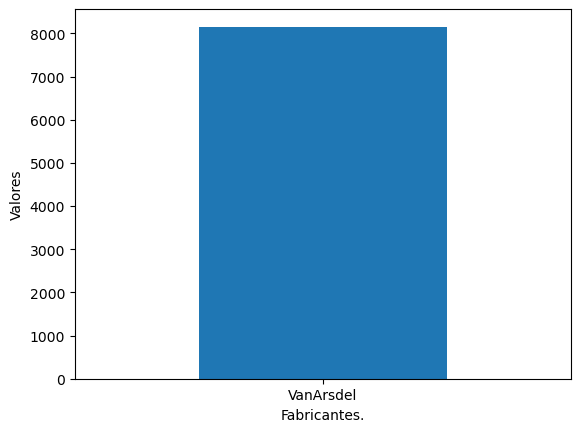

In [54]:
#Verificando o valor total de vendas em fev/2014 em gráfico de barras
fev_2014.groupby(['Fabricante']).size().head(10).sort_values(ascending=False).plot.bar(xlabel='Fabricantes.',ylabel='Valores', rot=0)

#### Exercício 2 - Quais os top 10 Produtos referente a Jan/2014 em Total de custo (R$)

In [55]:
#Realizando o filtro do ano e mês
filtro_jan_2014 = df2[(df2['Data'].dt.year == 2014) & (df2['Data'].dt.month == 1)]

In [56]:
filtro_jan_2014.groupby('Produto')['CustoUnitario'].sum().sort_values(ascending=False).head(10)

Produto
Maximus UM-54    70096.662615
Maximus UM-11    37329.657592
Maximus UM-75    31162.375597
Maximus UM-12    20338.410645
Maximus UM-13    18832.180657
Maximus UM-10    18012.270937
Maximus UM-66    17632.512345
Maximus UM-56    17420.391135
Maximus UM-33    15003.570645
Maximus UM-26    13865.571090
Name: CustoUnitario, dtype: float64

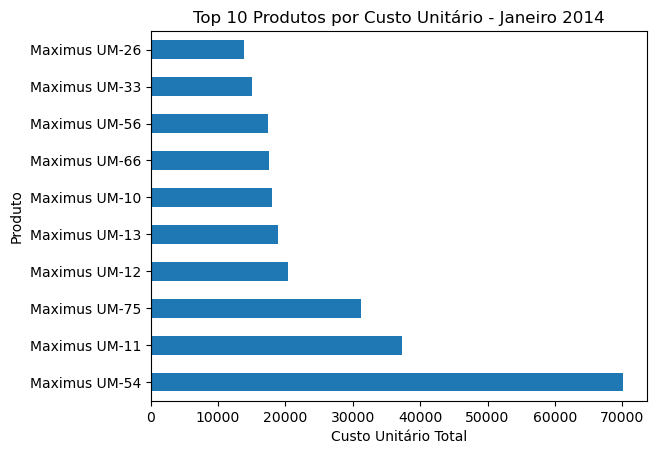

In [57]:
#Agrupando os produtos e custo unitário após filtro jan/2014
soma_custos = filtro_jan_2014.groupby('Produto')['CustoUnitario'].sum()

#Colocando em ordem decrescente
soma_custos = soma_custos.sort_values(ascending=False)

#Selecionando os top 10
#top_10 = soma_custos.head(10)

top_10 = soma_custos.nlargest(10)

#Aplicando ao gráfico
top_10.plot(kind='barh')

#Título e rótulos dos eixos
plt.title('Top 10 Produtos por Custo Unitário - Janeiro 2014')
plt.xlabel('Custo Unitário Total')
plt.ylabel('Produto')

plt.show()


#### Exercício 3 - Qual o total de vendas no 1º Trimestre/2014 por Segmento?

In [58]:
#Realizando o filtro do ano 2014 do primeiro trimestre
filtro_tri_2014 = df2[(df2['Data'].dt.year == 2014) & (df2['Data'].dt.month <= 3)]
filtro_tri_2014.head(10)

,Data,Unidades,Produto,Categoria,Segmento,Fabricante,CustoUnitario,PrecoUnitario,Cidade,Estado,Regiao,Pais,Email,Nome,TotalVendas,CustoTotal
8,2014-03-09,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Kimberley.Mccarthy@xyza.com,Kimberley Mccarthy,102.36975,74.729917
13,2014-01-22,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Matthew.Vargas@xyza.com,Matthew Vargas,102.36975,74.729917
14,2014-02-12,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Timon.Hartman@xyza.com,Timon Hartman,102.36975,74.729917
15,2014-02-14,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Abraham.George@xyza.com,Abraham George,102.36975,74.729917
25,2014-01-15,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Ivory.Luna@xyza.com,Ivory Luna,102.36975,74.729917
26,2014-03-17,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Keely.Castillo@xyza.com,Keely Castillo,102.36975,74.729917
33,2014-01-24,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Denton.Mercado@xyza.com,Denton Mercado,102.36975,74.729917
36,2014-03-20,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Karen.Carr@xyza.com,Karen Carr,102.36975,74.729917
42,2014-01-22,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Amaya.Dale@xyza.com,Amaya Dale,102.36975,74.729917
43,2014-03-02,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Alika.Riddle@xyza.com,Alika Riddle,102.36975,74.729917


In [59]:
# Calculando o total de vendas do primeiro trimestre de 2014

filtro_tri_2014 = df2[(df2['Data'].dt.year == 2014) & (df2['Data'].dt.month <= 3)]

# Calculando o total de vendas do trimestre
total_vendas_tri = filtro_tri_2014['TotalVendas'].sum()

#Total de vendas do trimestre
print(f"Total de vendas do primeiro trimestre de 2014: R$ {total_vendas_tri}")


Total de vendas do primeiro trimestre de 2014: R$ 2687369.0445


#### Exercício 4 - Quais as Top 5 Segmentos em 2014 sobre o total de Vendas(R$)?

In [60]:
#Extraindo dados de 2014
ano_2014 = df2[(df2['Data'].dt.year == 2014)]
ano_2014

,Data,Unidades,Produto,Categoria,Segmento,Fabricante,CustoUnitario,PrecoUnitario,Cidade,Estado,Regiao,Pais,Email,Nome,TotalVendas,CustoTotal
4,2014-09-13,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Ivana.Wall@xyza.com,Ivana Wall,102.36975,74.729917
5,2014-09-20,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Josephine.Ochoa@xyza.com,Josephine Ochoa,102.36975,74.729917
6,2014-09-27,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Kyle.Cotton@xyza.com,Kyle Cotton,102.36975,74.729917
8,2014-03-09,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Kimberley.Mccarthy@xyza.com,Kimberley Mccarthy,102.36975,74.729917
12,2014-04-24,1,Maximus UM-54,Urban,Moderation,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,Barclay.Wall@xyza.com,Barclay Wall,102.36975,74.729917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675324,2014-07-20,1,Maximus UM-12,Accessory,Accessory,VanArsdel,116.887417,160.11975,Pensacola,FL,East,USA,Octavius.Morin@xyza.com,Octavius Morin,160.11975,116.887417
675339,2014-04-05,1,Maximus UM-12,Accessory,Accessory,VanArsdel,116.887417,160.11975,Panama City Beach,FL,East,USA,Quynn.Dale@xyza.com,Quynn Dale,160.11975,116.887417
675340,2014-04-05,1,Maximus UM-12,Accessory,Accessory,VanArsdel,116.887417,160.11975,Panama City Beach,FL,East,USA,Price.Larson@xyza.com,Price Larson,160.11975,116.887417
675341,2014-05-30,1,Maximus UM-12,Accessory,Accessory,VanArsdel,116.887417,160.11975,Crestview,FL,East,USA,Lysandra.Greene@xyza.com,Lysandra Greene,160.11975,116.887417


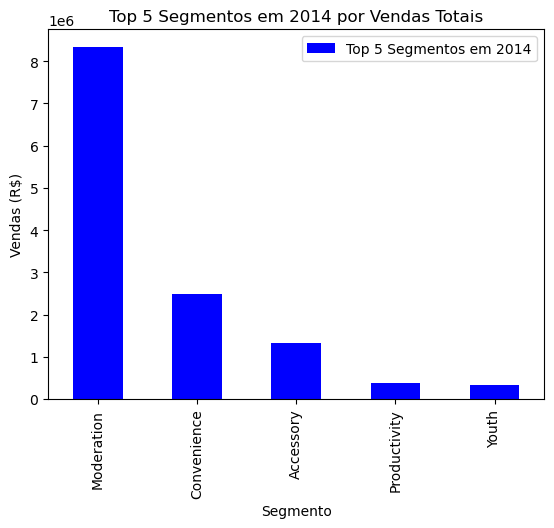

In [61]:
# Filtrando os dados de 2014
ano_2014 = df2[df2["Data"].dt.year == 2014]

#Calculando as vendas totais por segmento em 2014
vendas_por_segmento = ano_2014.groupby('Segmento')['TotalVendas'].sum()

#Selecionando os top 5 segmentos com mais vendas em 2014
top_5_segmentos = vendas_por_segmento.nlargest(5)

# Plotar o gráfico
top_5_segmentos.plot(kind='bar', color='blue', label='Top 5 Segmentos em 2014')
plt.xlabel('Segmento')
plt.ylabel('Vendas (R$)')
plt.title('Top 5 Segmentos em 2014 por Vendas Totais')
plt.legend()
plt.show()


#### Exercício 5 - Qual o Total de Vendas(R$) mês a mês em 2014?

In [62]:
#Filtrando o ano 2014
ano_2014_venda = df2[df2['Data'].dt.year == 2014]

#Extraindo os meses
ano_2014_venda['Mes'] = ano_2014_venda['Data'].dt.month


C:\Users\ngfiamoncini\AppData\Local\Temp\ipykernel_17260\1307816312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ano_2014_venda['Mes'] = ano_2014_venda['Data'].dt.month


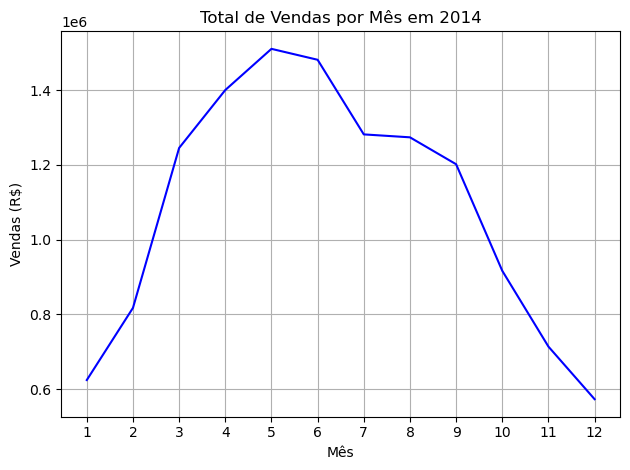

In [63]:
vendas_por_mes = ano_2014_venda.groupby('Mes')['TotalVendas'].sum()

#Plotando o gráfico de barras para mostrar as vendas mês a mês em 2014
vendas_por_mes.plot(kind='line', color='blue')

#rótulos e título
plt.xlabel('Mês')
plt.ylabel('Vendas (R$)')
plt.title('Total de Vendas por Mês em 2014')

#Aplicando as vendas números dos meses
plt.xticks(range(1, 13), range(1, 13))

#Plotando gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

#### Exercício 6 - Qual o total de Lucro mês a mês em 2014?

In [64]:
#Filtrando o ano 2014 
ano_2014_lucro = df2[df2['Data'].dt.year == 2014]

#Extraindo os meses
ano_2014_lucro['Mes'] = ano_2014_lucro['Data'].dt.month

ano_2014_lucro['Total_Lucro'] = (ano_2014_lucro['TotalVendas'] - ano_2014_lucro['CustoTotal']) 

C:\Users\ngfiamoncini\AppData\Local\Temp\ipykernel_17260\625874370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ano_2014_lucro['Mes'] = ano_2014_lucro['Data'].dt.month
C:\Users\ngfiamoncini\AppData\Local\Temp\ipykernel_17260\625874370.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ano_2014_lucro['Total_Lucro'] = (ano_2014_lucro['TotalVendas'] - ano_2014_lucro['CustoTotal'])


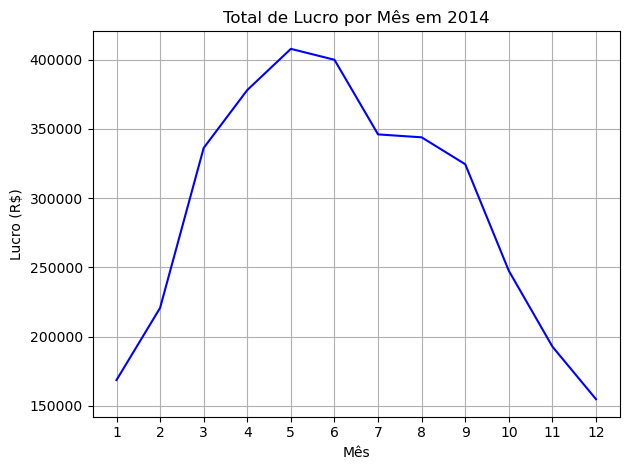

In [65]:
lucro_por_mes = ano_2014_lucro.groupby('Mes')['Total_Lucro'].sum()

#Plotando o gráfico de barras para mostrar as vendas mês a mês em 2014
lucro_por_mes.plot(kind='line', color='blue')

#rótulos e título
plt.xlabel('Mês')
plt.ylabel('Lucro (R$)')
plt.title('Total de Lucro por Mês em 2014')

#Aplicando as vendas números dos meses
plt.xticks(range(1, 13), range(1, 13))

#Plotando gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

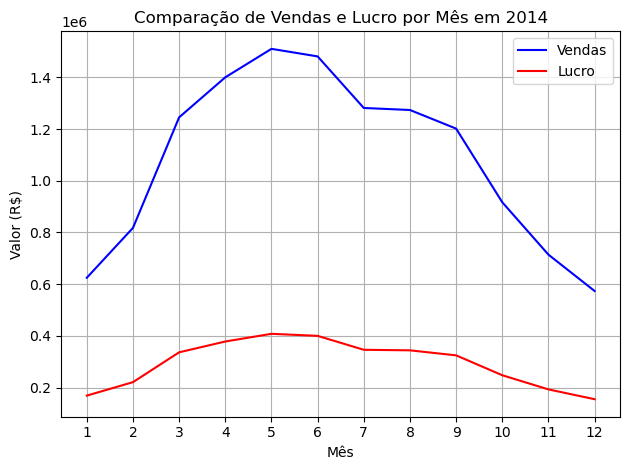

In [66]:
#Paralelo comparativo entre Venda X Lucro

#Calculo o total de vendas por mês em 2014
vendas_por_mes = ano_2014_venda.groupby('Mes')['TotalVendas'].sum()

#gráfico de linha para mostrar as vendas mês a mês em 2014
plt.plot(vendas_por_mes.index, vendas_por_mes.values, color='blue', label='Vendas')

#total de lucro por mês em 2014
lucro_por_mes = ano_2014_lucro.groupby('Mes')['Total_Lucro'].sum()

#gráfico de linha para mostrar o lucro mês a mês em 2014
plt.plot(lucro_por_mes.index, lucro_por_mes.values, color='red', label='Lucro')

# rótulos e título
plt.xlabel('Mês')
plt.ylabel('Valor (R$)')
plt.title('Comparação de Vendas e Lucro por Mês em 2014')

#rótulos do eixo x como os números dos meses
plt.xticks(range(1, 13), range(1, 13))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Exercício 7 - Qual a variação %(MoM) de Total de vendas (R$) de Mar/2014 para Fev/2014 por Segmento.

<Axes: xlabel='Segmento'>

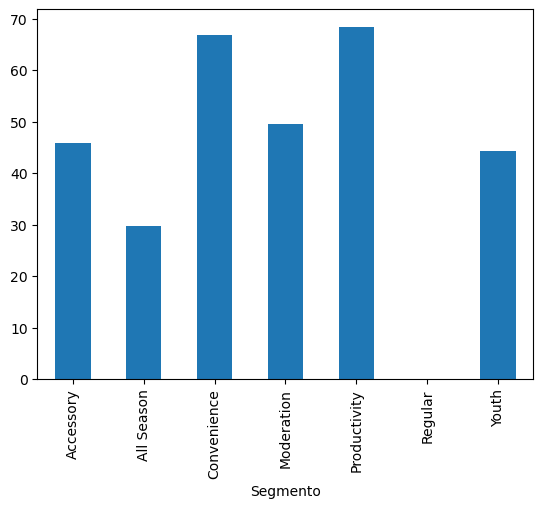

In [67]:
#Extraindo os dados de fevereiro e março 2014
fev_2014 = df2[(df2['Data'].dt.year == 2014) & (df2['Data'].dt.month == 2)]
mar_2014 = df2[(df2['Data'].dt.year == 2014) & (df2['Data'].dt.month == 3)]

vendas_fev = fev_2014.groupby('Segmento')['TotalVendas'].sum()
vendas_mar = mar_2014.groupby('Segmento')['TotalVendas'].sum()

variacao_MoM = ((vendas_mar - vendas_fev) / vendas_fev) * 100

variacao_MoM.plot(kind= 'bar')

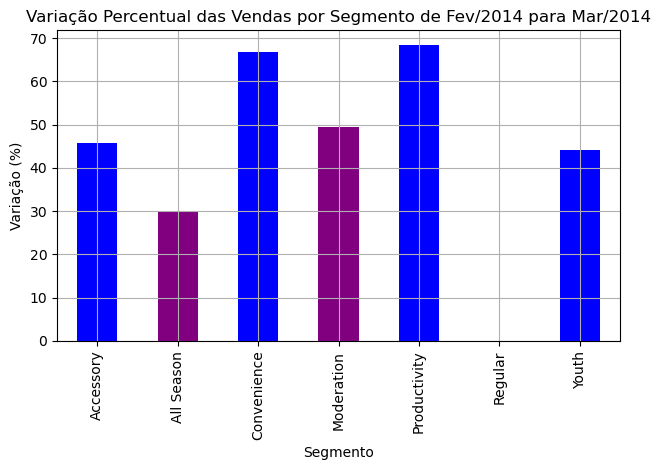

In [68]:
# Plotando o gráfico de barras da variação percentual mês a mês das vendas por segmento
variacao_MoM.plot(kind='bar', color=('blue', 'purple'))

# Adicionando rótulos e título
plt.xlabel('Segmento')
plt.ylabel('Variação (%)')
plt.title('Variação Percentual das Vendas por Segmento de Fev/2014 para Mar/2014')

# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


#### Exercício 8 - Retorne o maior Valor de custos (R$) e seu respectivo segmento em Fev/2014.

In [70]:
#Criando o filtro no ano e mes de fevereiro
fev_2014 = df2[(df2['Data'].dt.year == 2014) & (df2['Data'].dt.month == 2)]

#Selecionando o maior custo 
fev_2014['Maior_Custo'] = fev_2014['CustoTotal'].max()

#Selecionando o maior custo por segmento
maior_custo_fev = fev_2014.groupby('Segmento')['Maior_Custo']

#Selecionando o segmento
segmento_maior_custo = maior_custo_fev.idxmax()

print(f'O valor de maior custo é: {maior_custo_fev.max()}, no segmento: {segmento_maior_custo}')

O valor de maior custo é: Segmento
Accessory       147.930667
All Season      147.930667
Convenience     147.930667
Moderation      147.930667
Productivity    147.930667
Youth           147.930667
Name: Maior_Custo, dtype: float64, no segmento: Segmento
Accessory       637080
All Season      565178
Convenience     366622
Moderation          14
Productivity    582672
Youth           620524
Name: Maior_Custo, dtype: int64


C:\Users\ngfiamoncini\AppData\Local\Temp\ipykernel_17260\658674163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fev_2014['Maior_Custo'] = fev_2014['CustoTotal'].max()


<Axes: xlabel='Segmento'>

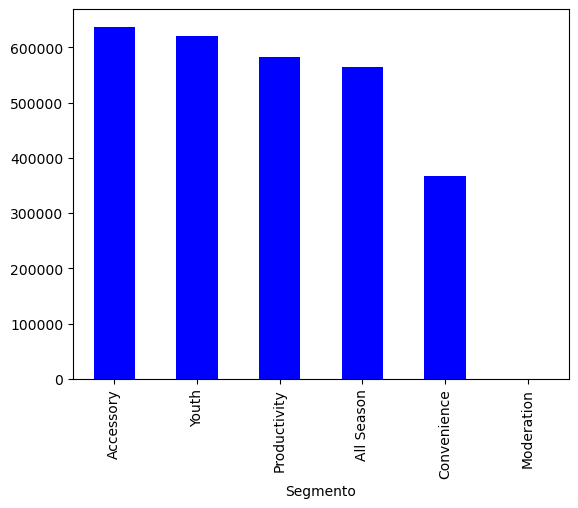

In [71]:
#Grafico dos maiores custos por segmento
maior_custo_fev_ordenado = segmento_maior_custo.sort_values(ascending=False)
maior_custo_fev_ordenado.plot(kind='bar', color='blue')

#### Exercício 9 - Retorne o % (Share) de Total de vendas (R$), por Segmento em Fev/2014.

In [72]:
#Crianod o filtro no ano e mes de fevereiro
fev_2014 = df2[(df2['Data'].dt.year == 2014) & (df2['Data'].dt.month == 2)]

#Selecionando venda total por segmento
total_vendas_segmento = fev_2014.groupby('Segmento')['TotalVendas'].sum()

# Calculando o total de vendas de todos os segmentos em fevereiro de 2014
total_vendas_fev_2014 = total_vendas_segmento.sum()

# Calcular o percentual de vendas totais por segmento em fevereiro de 2014
share_vendas_segmento = (total_vendas_segmento / total_vendas_fev_2014) * 100

share_vendas_segmento_ordenado = share_vendas_segmento.sort_values(ascending=False)

print("Share de Total de Vendas (R$) por Segmento em Fev/2014:")
print(round(share_vendas_segmento_ordenado, 2))



Share de Total de Vendas (R$) por Segmento em Fev/2014:
Segmento
Moderation      65.51
Convenience     18.13
Accessory        9.26
Youth            2.99
Productivity     2.41
All Season       1.71
Name: TotalVendas, dtype: float64


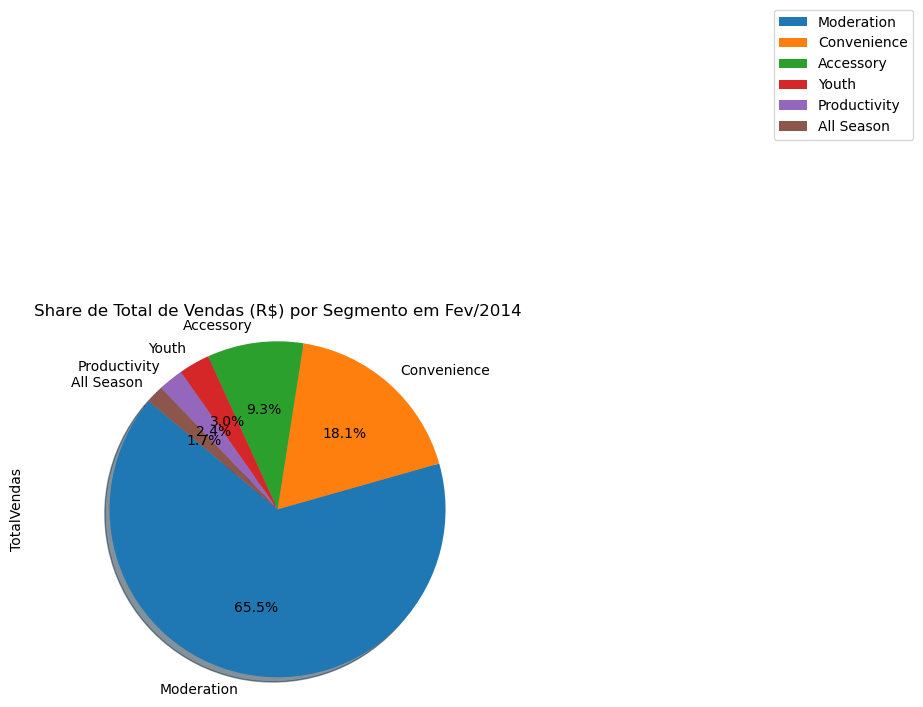

In [73]:
# Plotar o gráfico de pizza com os dados de share_vendas_segmento
share_vendas_segmento_ordenado.plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=140)

# Adicionar título
plt.title('Share de Total de Vendas (R$) por Segmento em Fev/2014')

#Legendas
plt.legend(loc=(1.5, 1.5))

#Plotar o gráfico
plt.axis('equal')  
plt.show()



#### Exercício 10 - Retorne o valor médio de Total de vendas Mês a Mês por segmento no ano de 2014.

In [74]:
#Crianod o filtro no ano e mes de fevereiro
ano_2014 = df2[(df2['Data'].dt.year == 2014)]

#Selecionando a média de venda total por segmento
media_vendas_segmento = ano_2014.groupby('Segmento')['TotalVendas'].mean()

#Ordenado
media_vendas_segmento_ordenado = media_vendas_segmento.sort_values(ascending=False)

media_vendas_segmento_ordenado

Segmento
Accessory       145.110533
Moderation      113.019457
Youth            76.344266
All Season       73.456451
Convenience      71.011649
Productivity     68.979567
Extreme          59.373750
Regular          24.123750
Name: TotalVendas, dtype: float64

In [ ]:
media_vendas_segmento_ordenado.plot(kind= 'bar')

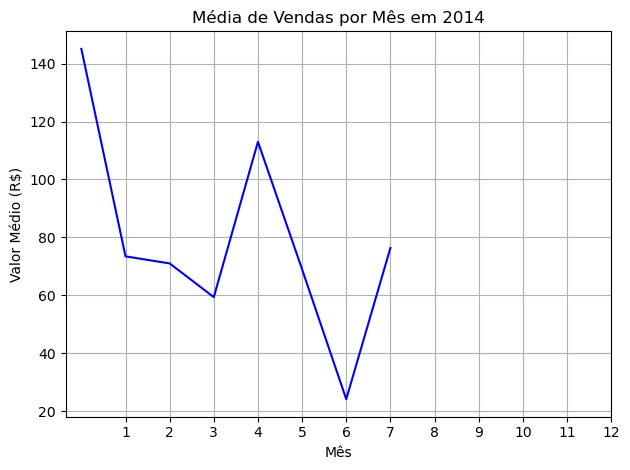

In [75]:
#media_vendas_segmento = ano_2014.groupby('Segmento')['TotalVendas'].mean()

#Plotando o gráfico de barras para mostrar as vendas mês a mês em 2014
media_vendas_segmento.plot(kind='line', color='blue')

#rótulos e título
plt.xlabel('Mês')
plt.ylabel('Valor Médio (R$)')
plt.title('Média de Vendas por Mês em 2014')

#Aplicando as vendas números dos meses
plt.xticks(range(1, 13), range(1, 13))

#Plotando gráfico
plt.grid(True)
plt.tight_layout()
plt.show()